# MOOC Dropout Prediction using KDDCup 2015 Dataset

### Author:
Hari Sai Sharan Sanganabatla, 
Department of Computer Science,
University at Albany,SUNY.

### Introduction:


   Online  learnings havebecome  very  popular over the  past  few  yearswhere  students  started enrolling in online  courses  of  their  interest.One  of  the prominent downsidesofthe  online learning systems is dropout prediction whether a student enrolled in a course is likely to persist or drop out of that course. This dropout prediction will help creators to build courses in a better way and ones with a low dropout ratewhich makes learning easy for students.

## Data Description:

   KDDCup2015 Dataset which has the data of courses, modules of that courses and students enrolled inthose courses  and  the  log  data of  the  events  performed by  students  on a particular  course  to  which they are enrolled.The dataset has the data of 40 online courses and 27,250 modules (A course can comprise of several modules, divided into chapters. Each one is represented as a row) and 72,936 enrollments to these courses and their logdata. 

## Files:

### 3.1 Date.csv
  - Each line contains the timespan of each course in our log data (both train and test data). The timespan of each course for calculating dropouts is 10 days after the last day of that course, i.e.,  course C is from 2014.4.1 to 2014.4.30 in the given data, a user enrolled the course C will be treated as a dropout if he/she leaves no record from 2014.5.1 to 2014.5.10.
  - course_id - course id
  - from - the first day of the course in log
  - to - the last day of the course in log


### 3.2 Object.csv

 Each line in this file describes a module in a course with its category, children objects and release  time. Those modules represent different online materials of the courses, e.g., chapters, videos, problem sets and etc. The modules are organized as a tree, i.e., each course contains several chapters; each chapter contains several sections; and each section contains several objects (videos, problem sets, and etc).
 - course_id - The course to which the module belongs.
 - module_id - The ID of a course module.
 - category - The category of the course module.
 - children - The children modules of the course module.
 - start - The time that the module was released to students.

### 3.3 Enrollment_train.csv

 Each line is a course enrollment record with an enrollment id, a username U and a course id C, indicating that U enrolled in course C.
 - enrollment_id - Enrollment ID
 - username - Student ID.
 - course_id - Course ID.


### 3.4  log_train.csv

 Each line is a behavior record. Each event contains the following information: enrollment_id, username, course_id, time, source (server or browser), event, and object. 
 - enrollment_id - Enrollment ID.
 - time - Time of the event.
 - source - Event source (server or browser).
 - event - In terms of event type, we defined 7 different event types:
  1. problem - Working on course assignments.
  2. video - Watching course videos.
  3. access - Accessing other course objects except videos and assignments.
  4. wiki - Accessing the course wiki.
  5. discussion - Accessing the course forum.
  6. navigate - Navigating to other part of the course.
  7. page_close - Closing the web page.
 - object - The object the student access or navigate to.

### 3.5 Truth_train.csv

 Each line contains information about the ground truth of enrollments in the training set. 
 - enrollment_id - Enrollment ID. 
 - dropout - Ground truth of dropout (1 for a dropout event and 0 for continuing study)

### Initially, we merge object file and log_train file based on the module id's.

In [1]:
import pandas as pd
a = pd.read_csv('object.csv')
b = pd.read_csv('log_train.csv')
merge = b.merge(a,left_on='object',right_on='module_id')
merge.to_csv("finald.csv",index=False)

### The merged file is then written into another file called "finald.csv" which is used in the further process

In [2]:
merge1=pd.read_csv('finald.csv')
merge1.head()

C:\Users\saima\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,enrollment_id,time,source,event,object,course_id,module_id,category,children,start
0,1,2014-06-14T09:38:39,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,sequential,eYrKKricgwe3xyR0sBnvtQ70ItlYLlKs QLs2SBYSxph4E...,2013-11-04T01:00:00
1,1,2014-06-19T06:21:32,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,sequential,eYrKKricgwe3xyR0sBnvtQ70ItlYLlKs QLs2SBYSxph4E...,2013-11-04T01:00:00
2,1,2014-06-27T01:24:00,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,sequential,eYrKKricgwe3xyR0sBnvtQ70ItlYLlKs QLs2SBYSxph4E...,2013-11-04T01:00:00
3,1,2014-07-01T08:55:22,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,sequential,eYrKKricgwe3xyR0sBnvtQ70ItlYLlKs QLs2SBYSxph4E...,2013-11-04T01:00:00
4,4,2014-06-15T01:44:13,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,sequential,eYrKKricgwe3xyR0sBnvtQ70ItlYLlKs QLs2SBYSxph4E...,2013-11-04T01:00:00


### The formed Dataset is then sorted on the basis of enrollment_id

In [3]:
merge1.sort_values(by='enrollment_id',inplace=True)
merge1.head()

,enrollment_id,time,source,event,object,course_id,module_id,category,children,start
0,1,2014-06-14T09:38:39,server,access,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,sequential,eYrKKricgwe3xyR0sBnvtQ70ItlYLlKs QLs2SBYSxph4E...,2013-11-04T01:00:00
485891,1,2014-07-11T08:59:01,browser,problem,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,problem,NaN,NaN
485892,1,2014-07-11T08:59:46,browser,problem,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,problem,NaN,NaN
486075,1,2014-07-11T08:59:05,server,access,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,sequential,jJo0NTw9rqOgyiWdiAGIjY1uNmzSPEW4 yzbySK2Zk3zIJ...,NaN
486076,1,2014-07-11T09:12:55,browser,access,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,sequential,jJo0NTw9rqOgyiWdiAGIjY1uNmzSPEW4 yzbySK2Zk3zIJ...,NaN


### The object data from the file is taken and categorized into integer values for classification.

In [4]:
replace_dict = {"source" : {"server":0,"browser":1},
                "event"  : {"problem":1,"video":2,"access":3,"wiki":4,"discussion":5,"navigate":6,"page_close":7},
                "category" : {"sequential":1,"problem":2,"chapter":3,"video":4}
    
}
merge1.replace(replace_dict,inplace=True)
merge1.head()

,enrollment_id,time,source,event,object,course_id,module_id,category,children,start
0,1,2014-06-14T09:38:39,0,3,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,qxvBNYTfiRkNcCvM0hcGwG6hvHdQwnd4,1,eYrKKricgwe3xyR0sBnvtQ70ItlYLlKs QLs2SBYSxph4E...,2013-11-04T01:00:00
485891,1,2014-07-11T08:59:01,1,1,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,2,NaN,NaN
485892,1,2014-07-11T08:59:46,1,1,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,5nh9lt9wd3cx8019zoIkYNuMpfFLFYSL,2,NaN,NaN
486075,1,2014-07-11T08:59:05,0,3,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,1,jJo0NTw9rqOgyiWdiAGIjY1uNmzSPEW4 yzbySK2Zk3zIJ...,NaN
486076,1,2014-07-11T09:12:55,1,3,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,DPnLzkJJqOOPRJfBxIHbQEERiYHu5ila,YPEVl6YwNMdAZqaD5eGuzTQ68tzQX8KX,1,jJo0NTw9rqOgyiWdiAGIjY1uNmzSPEW4 yzbySK2Zk3zIJ...,NaN


### The final dataset that needs to be used for classification is built here using iloc.

In [5]:
c = merge1.groupby(['enrollment_id']).count()
id = list(pd.unique(merge1['enrollment_id'].values))
count1 = list(c['source'])

In [6]:
server=[]
browser=[]
values=[]
j=1
for x in count1:
    if j ==1:
        w=merge1.iloc[j:x,:]
    else:
        w=merge1.iloc[j:j+x,:]
    j=x
    list1=list(w['source'])
    list2=list(w['event'])
    list3=list(w['category'])
    server_count=0
    browser_count=0
    problem_s = 0
    video_s = 0
    access_s = 0
    wiki_s =0 
    discussion_s=0
    navigate_s=0
    page_close_s=0
    problem_b = 0
    video_b = 0
    access_b = 0
    wiki_b =0 
    discussion_b=0
    navigate_b=0
    page_close_b=0
    sequential1=0
    problem=0
    chapter=0
    video=0
    dict2 = {1:problem_s,2:video_s,3:access_s,4:wiki_s,5:discussion_s,6:navigate_s,7:page_close_s}
    dict3 = {1:problem_b,2:video_b,3:access_b,4:wiki_b,5:discussion_b,6:navigate_b,7:page_close_b}
    dict4 = {1:sequential1,2:chapter,3:problem,4:video}
    for i in range(len(list1)):
        dict4[list3[i]]+=1
        if list1[i] == 0 :
            server_count+=1
            dict2[list2[i]]+=1
        else:
            browser_count+=1
            dict3[list2[i]]+=1

    server.append(server_count)
    browser.append(browser_count)
    values.append(list(dict2.values())+list(dict3.values())+list(dict4.values()))
    
 

In [7]:
temp2=[]
for k in range(18):
    temp=[]
    for i in values:
        temp.append(i[k])
    temp2.append(temp)   

In [8]:
X=pd.DataFrame()
X['enrollment_id']=id
X['server_count']=server
X['browser_count']=browser
X['problem_s']=temp2[0]
X['video_s']=temp2[1]
X['access_s']=temp2[2]
X['wiki_s']=temp2[3]
X['discussion_s']=temp2[4]
X['navigate_s']=temp2[5]
X['page_close_s']=temp2[6]
X['problem_b']=temp2[7]
X['video_b']=temp2[8]
X['access_b']=temp2[9]
X['wiki_b']=temp2[10]
X['discussion_b']=temp2[11]
X['navigate_b']=temp2[12]
X['page_close_b']=temp2[13]
X['category_sequential']=temp2[14]
X['category_chapter']=temp2[15]
X['category_problem']=temp2[16]
X['category_video']=temp2[17]

In [9]:
z = pd.read_csv('truth_train.csv')
X=X.merge(z,on='enrollment_id')
X.shape

(84905, 22)

### The final dataset is written into a file called "FinalDataset.csv".

In [10]:
X.to_csv("FinalDataSet.csv",index=False)
X.head()

,enrollment_id,server_count,browser_count,problem_s,video_s,access_s,wiki_s,discussion_s,navigate_s,page_close_s,...,access_b,wiki_b,discussion_b,navigate_b,page_close_b,category_sequential,category_chapter,category_problem,category_video,dropout
0,1,79,125,8,0,71,0,0,0,0,...,21,0,0,0,0,79,83,13,29,0
1,3,38,188,3,0,35,0,0,0,0,...,34,0,0,0,0,60,148,9,9,0
2,4,15,47,2,0,13,0,0,0,0,...,12,0,0,0,0,19,35,6,2,0
3,5,165,317,9,0,156,0,0,0,0,...,63,0,0,0,0,192,215,27,48,0
4,6,12,2,0,0,12,0,0,0,0,...,0,0,0,0,0,8,0,4,2,0


### Columns that are not used in classification are dropped.

In [11]:
y=X["dropout"]
X.drop(["enrollment_id","dropout"],axis=1,inplace=True)


# Model Selection

### The built dataset is split into test and train for classification.

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
classifiers=[]
accuracy=[]
precision=[]
recall=[]
roc=[]

## Linear Discriminant Analysis

The confusion matrix for LinearDiscriminantAnalysis is:
 [[ 2144  4688]
 [  745 17895]]
roc_auc_score:  0.6369247595259873


C:\Users\saima\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


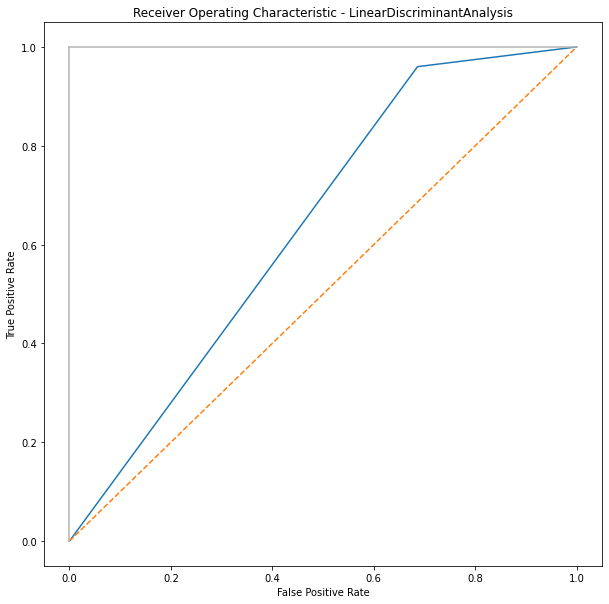

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for LinearDiscriminantAnalysis is:\n",cm)
classifiers.append('LinearDiscriminantAnalysis')
#Roc Curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LinearDiscriminantAnalysis')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Classification:

## 1. Logistic Regression

C:\Users\saima\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The confusion matrix for logistic regression is:
 [[ 2545  4287]
 [  979 17661]]
roc_auc_score:  0.6599951251872029


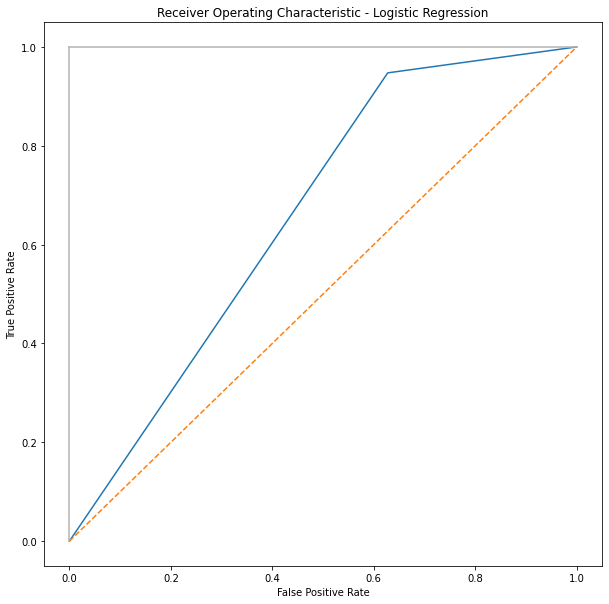

In [66]:
from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for logistic regression is:\n",cm)
classifiers.append('Logistic Regression')
#Roc Curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## 2. AdaBoostClassifier

The confusion matrix for AdaBoostClassifier is:
 [[ 3416  3416]
 [ 1576 17064]]
roc_auc_score:  0.7077253218884121


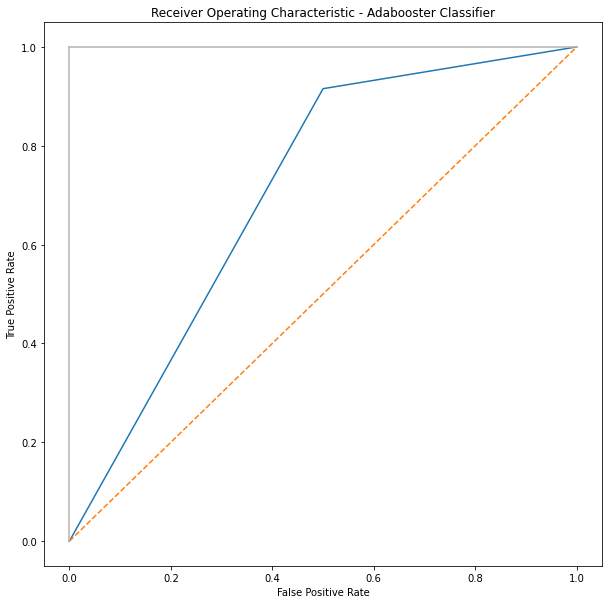

In [67]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for AdaBoostClassifier is:\n",cm)
classifiers.append('AdaBoostClassifier')
# Roc curve
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Adabooster Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3. Decison Tree Classification

The confusion matrix for Decision Tree Classification is:
 [[ 3167  3665]
 [ 2214 16426]]
roc_auc_score:  0.6723885200671418


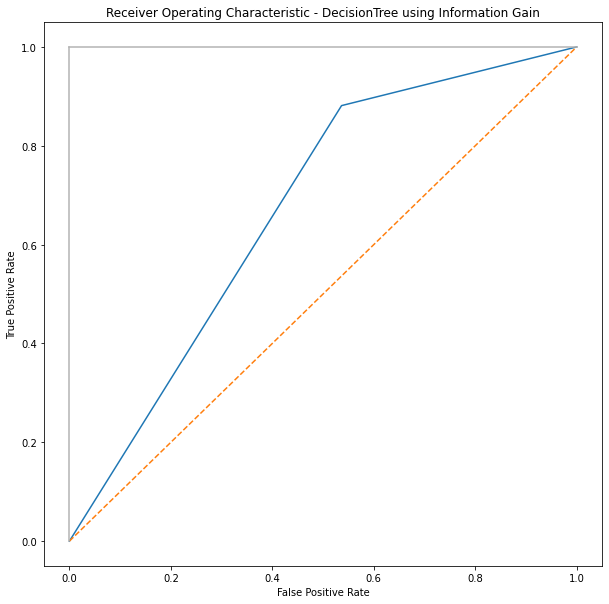

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for Decision Tree Classification is:\n",cm)
classifiers.append('Decision tree_entropy')
# Roc
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree using Information Gain')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The confusion matrix for Decision Tree Classification is:
 [[ 3139  3693]
 [ 2248 16392]]
roc_auc_score:  0.669427322571891


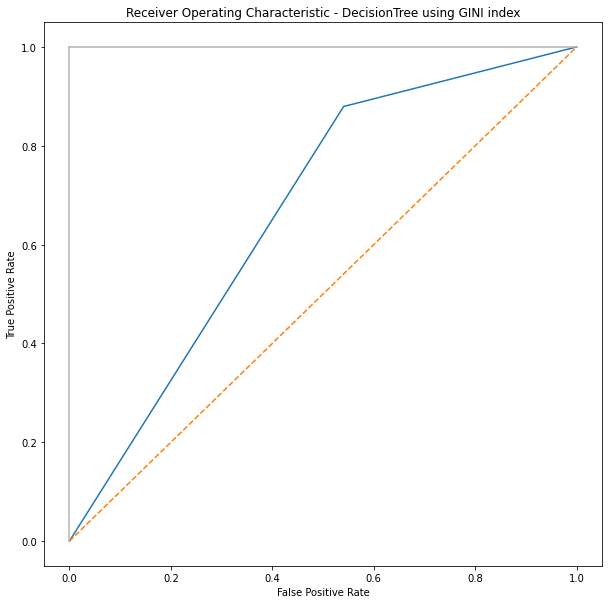

In [69]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for Decision Tree Classification is:\n",cm)
classifiers.append('Decision tree_gini')
# Roc
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree using GINI index')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4. K- Nearest Neighbour Classification

The confusion matrix for K- Nearest Neighbour Classification  is:
 [[ 3331  3501]
 [ 2047 16593]]
roc_auc_score:  0.6888704757214221


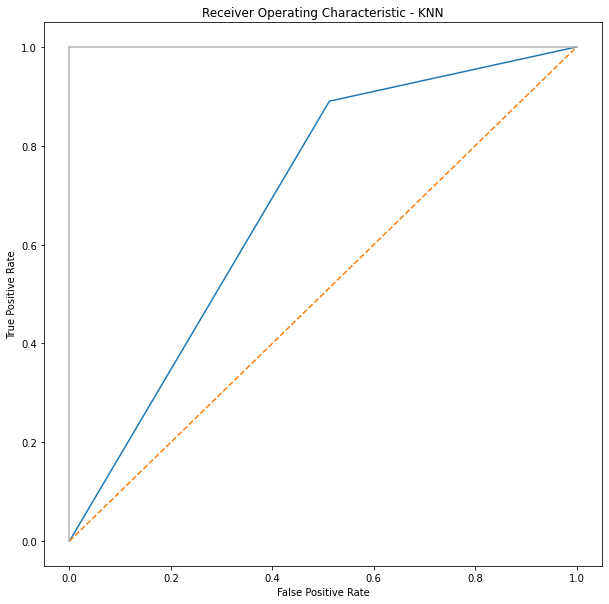

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)

#Predicting the Test Data using Train data
y_pred=classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for K- Nearest Neighbour Classification  is:\n",cm)
classifiers.append('K- Nearest Neighbour')
#roc
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5. Naive Bayes Classification

The confusion matrix for Naive Bayes Classification  is:
 [[ 2761  4071]
 [ 1069 17571]]
roc_auc_score:  0.673388924626348


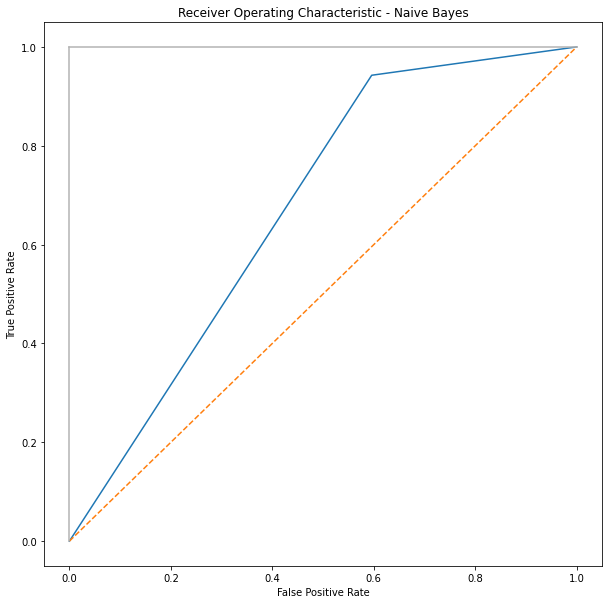

In [71]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for Naive Bayes Classification  is:\n",cm)
classifiers.append('Naive Bayes')
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 6. Random Forest Classification

The confusion matrix for Random Forest Classification  is:
 [[ 3169  3663]
 [ 1975 16665]]
roc_auc_score:  0.6789458342965695


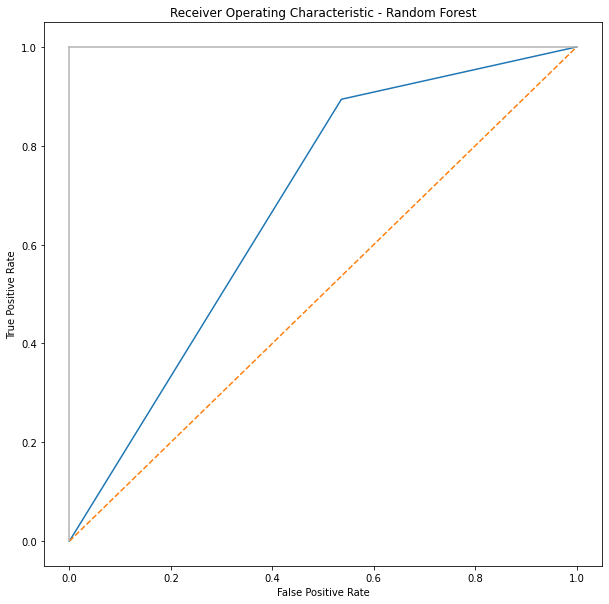

In [72]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for Random Forest Classification  is:\n",cm)
classifiers.append('Random Forest')
#roc
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## 7.GradientBoostingClassifier

The confusion matrix for GradientBoostingClassifier  is:
 [[ 3460  3372]
 [ 1595 17045]]
roc_auc_score:  0.710435805751274


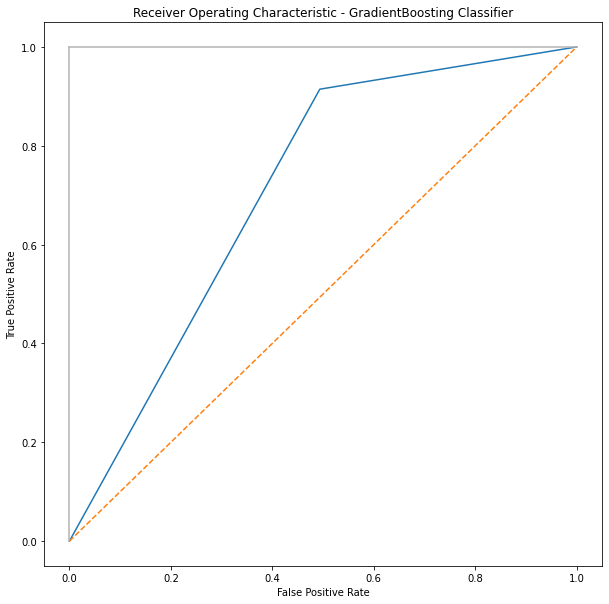

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy.append(accuracy_score(y_test,y_pred))
precision.append(precision_score(y_test,y_pred))
recall.append(recall_score(y_test,y_pred))
print("The confusion matrix for GradientBoostingClassifier  is:\n",cm)
classifiers.append('GradientBoostingClassifier')
#roc
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))
roc.append(roc_auc_score(y_test, y_pred))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - GradientBoosting Classifier')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
roc

[0.6369247595259873,
 0.6599951251872029,
 0.7077253218884121,
 0.6723885200671418,
 0.669427322571891,
 0.6888704757214221,
 0.673388924626348,
 0.6789458342965695,
 0.710435805751274]

### All the accuracy, precision and recall values for the predicted output of the classifiers are taken as list of values which are further used for visualization of data.

## VISUALIZATION

In [75]:
import matplotlib.pyplot as plt
df = pd.DataFrame()
df['Classifiers']=classifiers
df["Accuracy"]= accuracy
df["Precision_score"]=precision
df["Recall_score"]=recall
df['roc_score']=roc
df.set_index('Classifiers',inplace=True)
df

,Accuracy,Precision_score,Recall_score,roc_score
Classifiers,,,,
LinearDiscriminantAnalysis,0.786707,0.792410,0.960032,0.636925
Logistic Regression,0.793263,0.804675,0.947479,0.659995
AdaBoostClassifier,0.804020,0.833203,0.915451,0.707725
Decision tree_entropy,0.769198,0.817580,0.881223,0.672389
Decision tree_gini,0.766764,0.816131,0.879399,0.669427
K- Nearest Neighbour,0.782192,0.825769,0.890182,0.688870
Naive Bayes,0.798210,0.811894,0.942650,0.673389
Random Forest,0.778659,0.819805,0.894045,0.678946
GradientBoostingClassifier,0.805002,0.834844,0.914431,0.710436


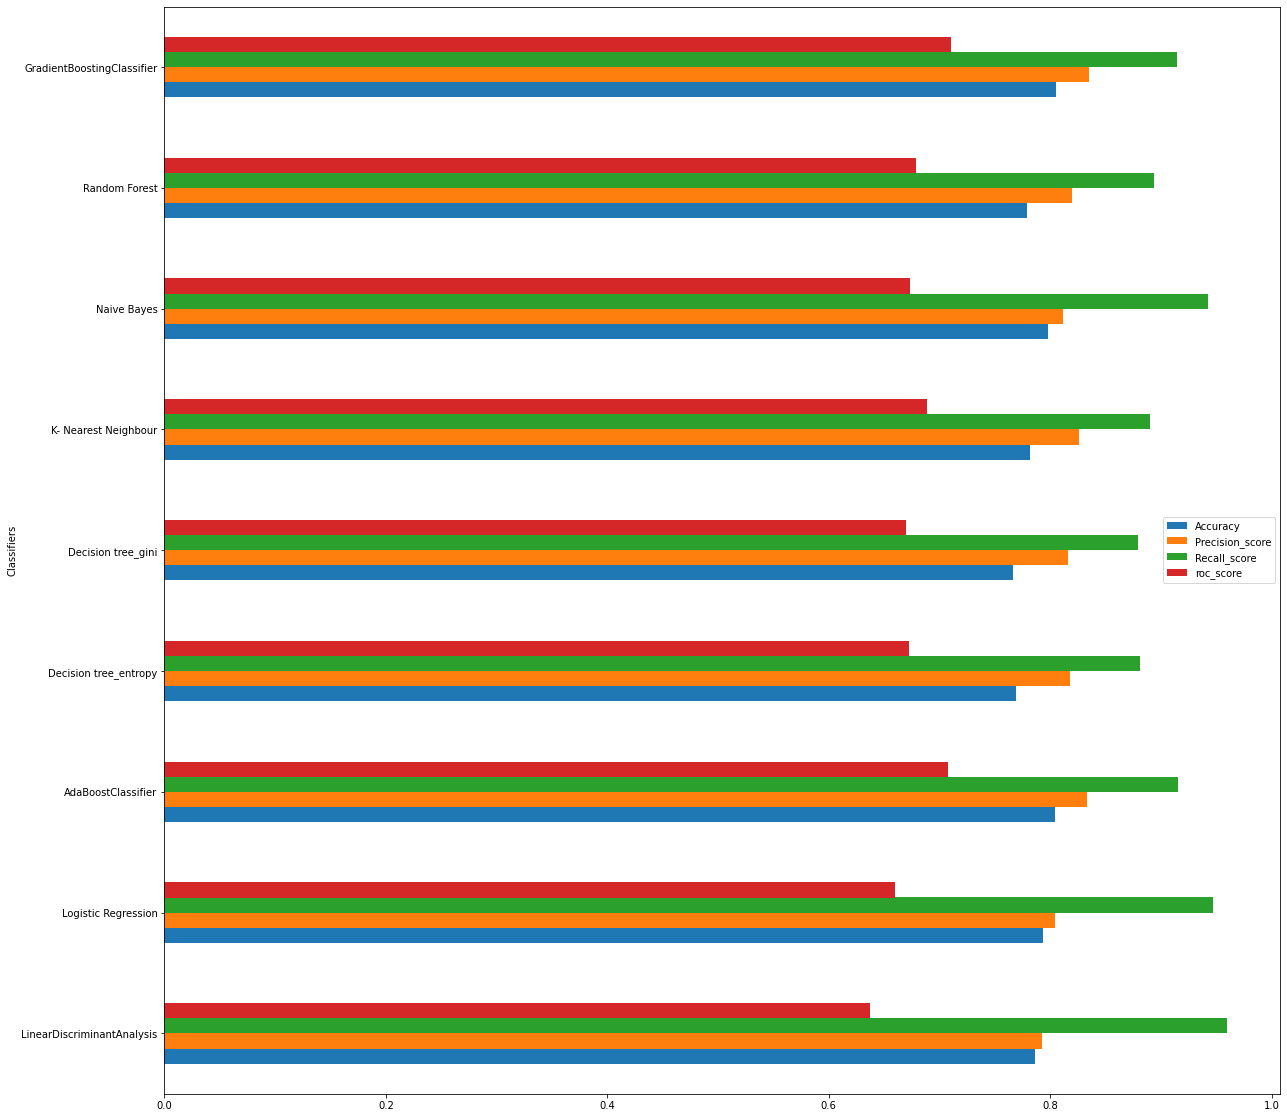

In [79]:
df.plot(kind='barh',figsize=(20,20))

In [80]:
print("The Best Fit Classification model for this Dataset is GradientBoosting Classifier with accuracy of",max(accuracy))

The Best Fit Classification model for this Dataset is GradientBoosting Classifier with accuracy of 0.8050015703517588


## Conclusion:

When we apply, the above classifications to our dataset. We can say the best fit model based on:
- Accuracy  : GradientBoosting Classifier
- Precision : GradientBoosting Classifier
- Recall    : Naive Bayes Classifier
- Roc_score : GradientBoosting Classifier


### We can conclude that the best fit model for our dataset by our analysis is GradientBoosting Classifier